In [1]:
import tensorflow as tf 

In [2]:
tf.__version__

'1.15.0'

In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import h5py

In [7]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [8]:
with h5py.File('/gdrive/My Drive/Colab Notebooks/Neural Networks/Project2/SVHN_single_grey1-2.h5', 'r') as f:
  ls = list(f.keys())
  for dataset in ls:
    data = f.get(dataset)
    dataset1 = np.array(data)
    print('shape of ', dataset,': \n', dataset1.shape)

shape of  X_test : 
 (18000, 32, 32)
shape of  X_train : 
 (42000, 32, 32)
shape of  X_val : 
 (60000, 32, 32)
shape of  y_test : 
 (18000,)
shape of  y_train : 
 (42000,)
shape of  y_val : 
 (60000,)


We have sufficient data for train, validation and test.

In [0]:
data = h5py.File('/gdrive/My Drive/Colab Notebooks/Neural Networks/Project2/SVHN_single_grey1-2.h5', 'r')

In [0]:
X_train = np.array(data.get('X_train'))

In [11]:
y_train = np.array(data.get('y_train'))
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

The images are of 32 x 32 shape and the target variable has 10 distinct values

In [0]:
X_val = np.array(data.get('X_val'))
y_val = np.array(data.get('y_val'))
X_test = np.array(data.get('X_test'))
y_test = np.array(data.get('y_test'))

In [0]:
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


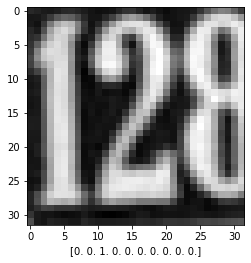

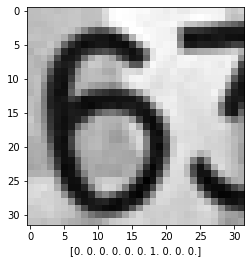

In [14]:
#lets display first 2 images with its class below
for i in range(0,2):
  plt.imshow(X_train[i],cmap='gray')
  plt.xlabel(y_train[i])
  plt.show()

In [17]:
#lets build the graph
tf.keras.backend.clear_session()
#initialize the model
model = tf.keras.models.Sequential()
#lets reshape the input
model.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32, )))
#lets add first hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
#lets add second hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#lets add the third hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#lets add  the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#lets compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
#lets train our model
model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=20, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 6s 153us/sample - loss: 2.4552 - acc: 0.1008 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
42000/42000 [==============================] - 6s 133us/sample - loss: 2.3028 - acc: 0.1009 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
42000/42000 [==============================] - 5s 131us/sample - loss: 2.3028 - acc: 0.1006 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
42000/42000 [==============================] - 6s 134us/sample - loss: 2.3028 - acc: 0.0985 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 5/20
42000/42000 [==============================] - 6s 133us/sample - loss: 2.3028 - acc: 0.0997 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/20
42000/42000 [==============================] - 6s 139us/sample - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20
42000/42000 [==============================] - 6s 138us/sample - loss: 2.3027 - acc: 0.0987 - val_l

when built model with out batch normalization and with 'relu' activation and 'sgd' optimizer, the loss has remained same through out the epochs which indicates vanishing gradient
so lets add momentum and decay

In [0]:
#lets build the model with 'sgd' optimizer by adding momentum and decay
tf.keras.backend.clear_session()
#initialize the model
model = tf.keras.models.Sequential()
#lets reshape the input
model.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32, )))
#lets batch normalise the data
#model.add(tf.keras.layers.BatchNormalization())
#lets add first hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))
#lets add second hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))
#lets add the third hidden layer
model.add(tf.keras.layers.Dense(5, activation='relu'))

In [0]:
#lets add  the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#lets compile the model
#Create optimizer with default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001, decay=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
#lets train our model
model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=20, batch_size=32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 89us/sample - loss: 2.9055 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
42000/42000 [==============================] - 4s 87us/sample - loss: 2.3026 - acc: 0.1016 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
42000/42000 [==============================] - 4s 88us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
42000/42000 [==============================] - 4s 87us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20
42000/42000 [==============================] - 4s 90us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 6/20
42000/42000 [==============================] - 4s 89us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/20
42000/42000 [==============================] - 4s 89us/sample - loss: 2.3026 - acc: 0.1019 - val_loss: 2.

even after momentum and decay has added, there is no change in accuracy. lets batch normalize the data.

In [0]:
#lets build the model with batch normalization
tf.keras.backend.clear_session()
#initialize the model
model = tf.keras.models.Sequential()
#lets reshape the input
model.add(tf.keras.layers.Reshape((1024,), input_shape=(32,32, )))
#lets batch normalise the data
model.add(tf.keras.layers.BatchNormalization())
#lets add first hidden layer
model.add(tf.keras.layers.Dense(300, activation='relu'))
#lets batch normalise the data
model.add(tf.keras.layers.BatchNormalization())
#lets add second hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
#lets batch normalise the data
model.add(tf.keras.layers.BatchNormalization())
#lets add the third hidden layer
model.add(tf.keras.layers.Dense(50, activation='relu'))
#lets add the third hidden layer
model.add(tf.keras.layers.Dense(20, activation='relu'))
#lets add the third hidden layer
model.add(tf.keras.layers.Dense(5, activation='relu'))
#lets batch normalise the data
model.add(tf.keras.layers.BatchNormalization())

In [0]:
#lets add  the output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
#lets compile the model
#Create optimizer with default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.002, decay=0.001, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 300)               307500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 200)               800       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                1

In [86]:
#lets train our model
model.fit(X_train,y_train,validation_data=(X_val, y_val), epochs=50)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 16s 375us/sample - loss: 1.9750 - acc: 0.3002 - val_loss: 1.6447 - val_acc: 0.4523
Epoch 2/50
42000/42000 [==============================] - 15s 357us/sample - loss: 1.5963 - acc: 0.4681 - val_loss: 1.3215 - val_acc: 0.5811
Epoch 3/50
42000/42000 [==============================] - 15s 352us/sample - loss: 1.3946 - acc: 0.5459 - val_loss: 1.1433 - val_acc: 0.6434
Epoch 4/50
42000/42000 [==============================] - 15s 360us/sample - loss: 1.2619 - acc: 0.5923 - val_loss: 1.0597 - val_acc: 0.6803
Epoch 5/50
42000/42000 [==============================] - 15s 353us/sample - loss: 1.1856 - acc: 0.6208 - val_loss: 0.9733 - val_acc: 0.7088
Epoch 6/50
42000/42000 [==============================] - 15s 363us/sample - loss: 1.1239 - acc: 0.6389 - val_loss: 0.9133 - val_acc: 0.7278
Epoch 7/50
42000/42000 [==============================] - 15s 346us/sample - loss: 1.0729 - acc: 0.6594 

In [87]:
test_acc = model.evaluate(X_test, y_test, batch_size=32)

18000/18000 [==============================] - 1s 68us/sample - loss: 0.7134 - acc: 0.7884


In [88]:
print('The Test accuracy is - ',test_acc[1])


The Test accuracy is -  0.78844446


batch normalizing the data has improved the accuracy of the model to a large extent . it has overcome the vanishing gradient.